# Un proyecto de Data Science

La idea de este _notebook_ es mostrar un proyecto de _Data Science_ de principio a fin. Para esto, vamos a trabajar con el _dataset_ `winequality-red.csv`, que contiene información de diversos vinos. La idea es poder predecir la calidad de un vino en función de las variables del mismo (por ejemplo, acidez, densidad, ph, entre otras).

## Explorando el dataset

Para partir, lo primero es cargar y explorar el _dataset_.

In [1]:
import pandas as pd

wine_df = pd.read_csv("winequality-red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Como vemos, disponemos solamente de _features_ numéricas. Ahora, lo primero que debemos hacer es entender cómo distribuye la variable que queremos predecir. Notemos que la variable `quality` es categorica ordinal, ya que tenemos un número finito de etiquetas en donde hay unas que son mejores que otras.

<AxesSubplot:xlabel='quality', ylabel='count'>

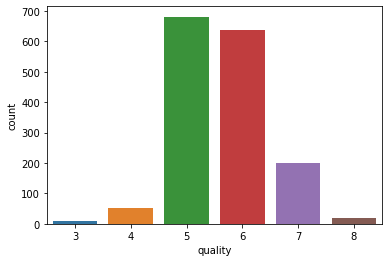

In [3]:
import seaborn as sns

sns.countplot(data=wine_df, x="quality")

Como vemos, la etiqueta 3 y la 8 son etiquetas muy raras, por lo que para hacer la tarea del modelo más abordable, vamos a tener que procesar estos valores.

## Entendiendo las variables

Ahora para ver cómo mejorar el desempeño del algoritmo, vamos a tratar de entender cómo se comporta cada una de las variables. Vamos a partir haciendo un histograma para cada una.

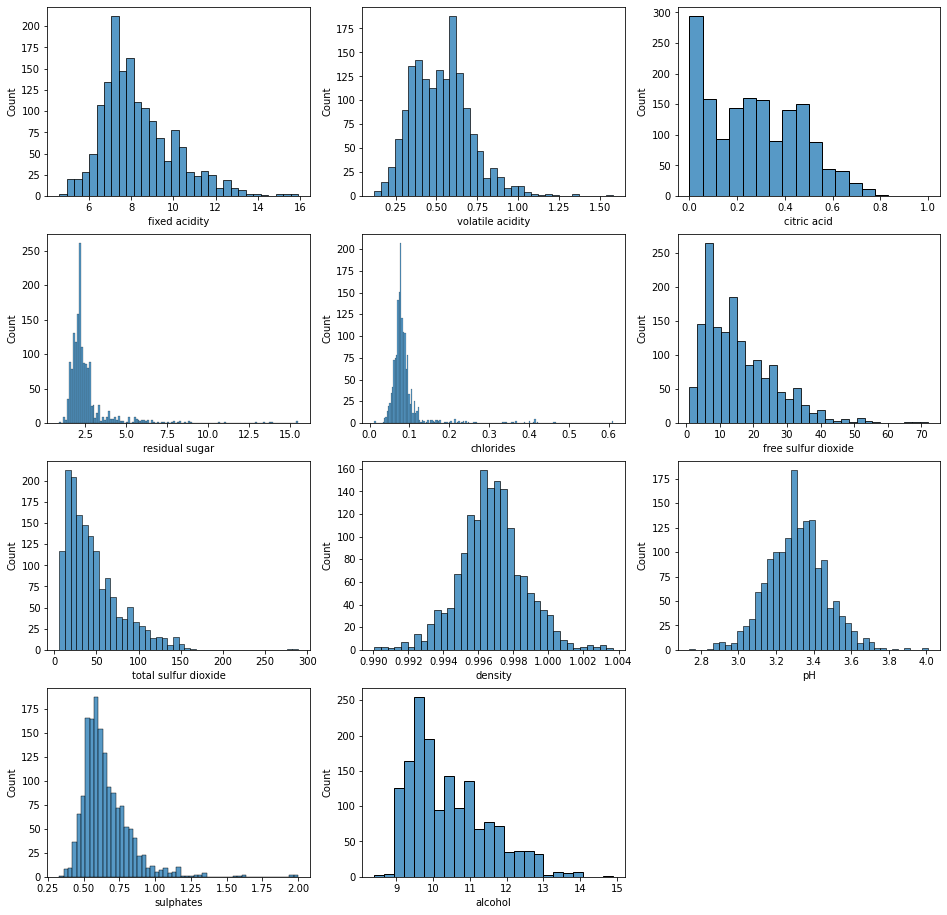

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(16,16))

sns.histplot(ax=ax[0][0], data=wine_df, x=wine_df.columns[0])
sns.histplot(ax=ax[0][1], data=wine_df, x=wine_df.columns[1])
sns.histplot(ax=ax[0][2], data=wine_df, x=wine_df.columns[2])
sns.histplot(ax=ax[1][0], data=wine_df, x=wine_df.columns[3])
sns.histplot(ax=ax[1][1], data=wine_df, x=wine_df.columns[4])
sns.histplot(ax=ax[1][2], data=wine_df, x=wine_df.columns[5])
sns.histplot(ax=ax[2][0], data=wine_df, x=wine_df.columns[6])
sns.histplot(ax=ax[2][1], data=wine_df, x=wine_df.columns[7])
sns.histplot(ax=ax[2][2], data=wine_df, x=wine_df.columns[8])
sns.histplot(ax=ax[3][0], data=wine_df, x=wine_df.columns[9])
sns.histplot(ax=ax[3][1], data=wine_df, x=wine_df.columns[10])

fig.delaxes(ax[3][2])

Como vemos, varias de las _features_ distribuyen de forma asimétrica. Ahora para entender cómo cambia la distribución ante las distintas etiquetas, vamos a hacer boxplot agrupados por etiqueta.

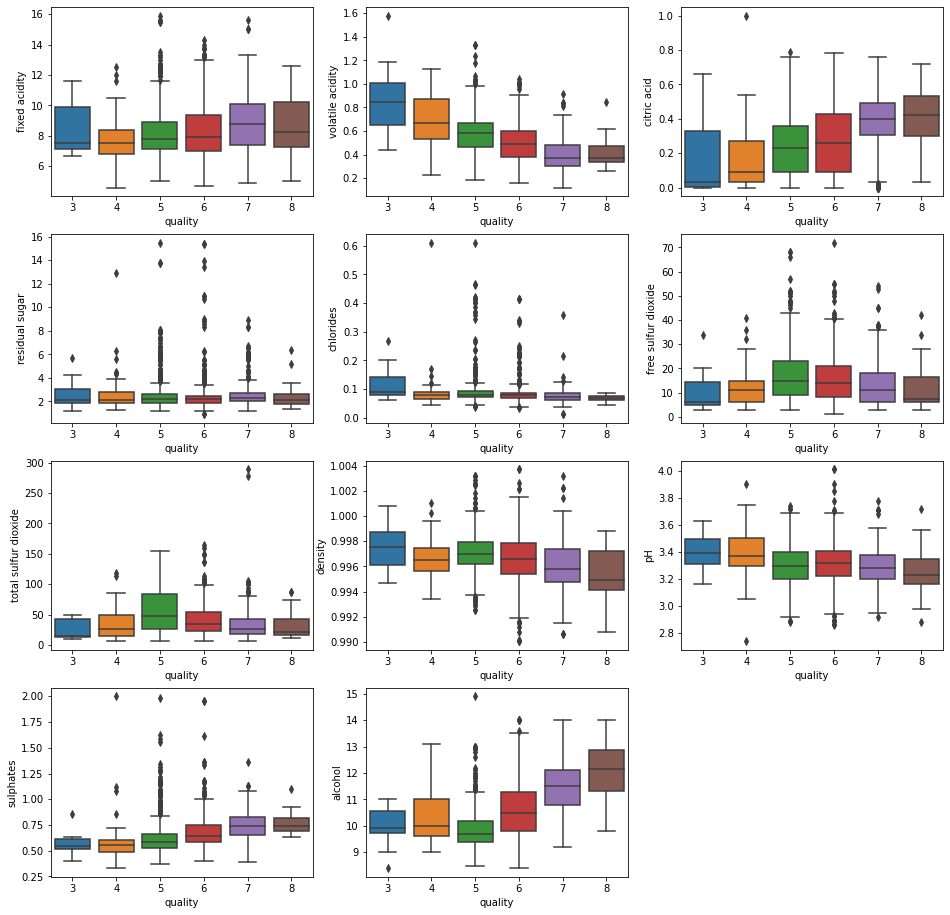

In [5]:
fig, ax = plt.subplots(4, 3, figsize=(16,16))

sns.boxplot(ax=ax[0][0], data=wine_df, y=wine_df.columns[0], x="quality")
sns.boxplot(ax=ax[0][1], data=wine_df, y=wine_df.columns[1], x="quality")
sns.boxplot(ax=ax[0][2], data=wine_df, y=wine_df.columns[2], x="quality")
sns.boxplot(ax=ax[1][0], data=wine_df, y=wine_df.columns[3], x="quality")
sns.boxplot(ax=ax[1][1], data=wine_df, y=wine_df.columns[4], x="quality")
sns.boxplot(ax=ax[1][2], data=wine_df, y=wine_df.columns[5], x="quality")
sns.boxplot(ax=ax[2][0], data=wine_df, y=wine_df.columns[6], x="quality")
sns.boxplot(ax=ax[2][1], data=wine_df, y=wine_df.columns[7], x="quality")
sns.boxplot(ax=ax[2][2], data=wine_df, y=wine_df.columns[8], x="quality")
sns.boxplot(ax=ax[3][0], data=wine_df, y=wine_df.columns[9], x="quality")
sns.boxplot(ax=ax[3][1], data=wine_df, y=wine_df.columns[10], x="quality")

fig.delaxes(ax[3][2])

Respecto a las columnas `residual sugar` y `chlorides`, notamos que hay una gran presencia de _outliers_ para todos los tipos de vino.

Como vemos, hay algunas variables en las que se aprecia como cambia la distribución para distintas calidades:

- `volatile acidity`
- `citric acid`
- `sulphates`
- `alcohol` (salvo para los vinos de baja calidad)

Además, notamos que las clases 3 y 4 distribuyen de forma bastante extraña. Esto es algo que vamos a trabajar en un momento.

## Creando un modelo baseline

Ahora lo que vamos a hacer es instanciar un modelo de Random Forest sin hacer ningún procesamiento en particular. Este será nuestro _baseline_, ya que después de procesar el _dataset_ deberíamos obtener algo mejor que esto.

In [6]:
# Primero separamos la variable que queremos predecir del DataFrame

X = wine_df.drop(["quality"], axis=1)
y = wine_df["quality"]

In [7]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [8]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Ahora vamos a separar el _dataset_ en entrenamiento y prueba.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Y ahora vamos a entrenar nuestro modelo. En esta ocasión usaremos el modelo "Random Forest".

In [10]:
from sklearn.ensemble import RandomForestClassifier

rndm_frst = RandomForestClassifier(n_estimators=100, max_depth=16)
rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)
y_pred

array([5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 7,
       6, 5, 5, 7, 5, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 5, 6, 7, 6,
       6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 5, 7,
       5, 7, 5, 5, 5, 6, 6, 7, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6,
       5, 6, 5, 6, 7, 5, 6, 7, 6, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 7, 5, 6,
       5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6,
       5, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 7, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5, 6, 5, 5, 6,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6,
       5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 7, 6, 7, 5, 6, 5,
       6, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 6, 6, 5,

Para obtener una evaluación rápida, vamos a usar el método `classification_report`.

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.81      0.78      0.79       184
           6       0.65      0.81      0.72       151
           7       0.74      0.51      0.60        49
           8       0.00      0.00      0.00         3

    accuracy                           0.73       400
   macro avg       0.37      0.35      0.35       400
weighted avg       0.71      0.73      0.71       400



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Como vemos, la clase 4 sigue siendo un problema: hay pocos vinos clase 3, 4 y 8 encontramos una mínima parte de ellos de ellos. Además la clase 7 también tiene problemas. Cada vez que dijimos que un vino era de clase 7, estuvimos bien el gran parte de las veces, pero el _recall_ sigue siendo bajo. Finalmente, el _accuracy_ está sobre un clasificador aleatorio, pero podríamos hacerlo mejor.

## Feature Importance

El modelo Random Forest puede decirnos la importancia de cada _feature_ en la fase de entrenamiento. Veamos cómo funciona en este caso.

In [12]:
feature_imp = pd.Series(
    rndm_frst.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

feature_imp

alcohol                 0.144139
sulphates               0.111809
volatile acidity        0.105871
total sulfur dioxide    0.100776
density                 0.094816
fixed acidity           0.076803
pH                      0.076475
citric acid             0.076302
chlorides               0.075946
residual sugar          0.072459
free sulfur dioxide     0.064604
dtype: float64

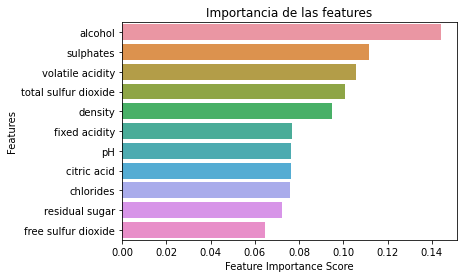

In [13]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Importancia de las features")
plt.show()

## Creando un modelo con las mejores variables y procesando el dataset

Ahora vamos a entrenar un modelo de _Random Forest_ solo con las variables que se veían más prometedoras. Para esto vamos a eliminar las dos últimas _features_: `residual sugar` (también por nuestro primer análisis) y además `free sulfur dioxide`, que parecía no servir de mucho para el modelo según el análisis del punto anterior. Además, vamos a eliminar los vinos de clase más baja, ya que finalmente solo terminan confundiendo al modelo. Finalmente, los de clase 8, los vamos a mover a 7; así la clase 7 representa "7 o más".

**Ojo**: lo ideal sería tener más datos de vinos malos para así poder entender mejor cuando un vino es de calidad 4 o peor, versus cuando es un vino de calidad 5 o mayor. Ya que los datos son pocos y su distribución parecía no contribuir, vamos a eliminar estos registros para centrarnos en la tarea que creemos que sí vamos a poder tener un buen desempeño.

In [14]:
def map_8(x):
    if x == 8:
        return 7
    else:
        return x
    
y_train_sel = y_train.map(map_8)
y_test_sel = y_test.map(map_8)

X_train_sel = X_train[y_train_sel > 4] 
X_test_sel = X_test[y_test_sel > 4]

y_train_sel = y_train_sel[y_train_sel > 4]
y_test_sel = y_test_sel[y_test_sel > 4]

X_train_sel_drop = X_train_sel.drop(["free sulfur dioxide", "residual sugar"], axis=1)
X_test_sel_drop = X_test_sel.drop(["free sulfur dioxide", "residual sugar"], axis=1)

rndm_frst = RandomForestClassifier(n_estimators=100, max_depth=16)
rndm_frst.fit(X_train_sel_drop, y_train_sel)

y_pred = rndm_frst.predict(X_test_sel_drop)
y_pred

array([5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       5, 7, 5, 6, 5, 6, 5, 7, 6, 5, 7, 6, 7, 6, 5, 5, 6, 7, 6, 6, 5, 6,
       6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 5, 7, 6, 5, 6, 5, 5, 7, 5, 6, 5,
       5, 5, 6, 6, 7, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6, 5, 6, 5,
       6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 6, 7, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 6,
       5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 6, 7,
       5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 7, 5, 7, 6, 6, 5, 6, 5, 7, 6, 6, 5,
       7, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 5, 6, 5, 5, 6, 6, 7, 6, 7, 6, 5,
       7, 5, 5, 5, 6, 7, 5, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       6, 6, 6, 7, 6, 6, 7, 6, 7, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6,
       7, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 5,

In [15]:
print(classification_report(y_test_sel, y_pred))

              precision    recall  f1-score   support

           5       0.82      0.82      0.82       184
           6       0.67      0.72      0.70       151
           7       0.67      0.54      0.60        52

    accuracy                           0.74       387
   macro avg       0.72      0.69      0.70       387
weighted avg       0.74      0.74      0.74       387



Como vemos, no conseguimos ningún cambio muy radical. Por lo mismo, para mejorar el modelo, tendremos que encontrar mejores parámetros para el mismo.

## Fine tuning del modelo

Para continuar, vamos a intentar mejorar los parámetros del modelo. Para esto utilizaremos Grid Search. La idea es probar combinaciones de parámetros hasta encontrar la mejor.

In [16]:
from sklearn.model_selection import GridSearchCV

# Como no es claro que eliminar columnas sea un pro, las dejaremos
# Usaremos X_train e y_train

# Creamos una grilla de parámetros para buscar
param_grid = {
    'max_depth': [12, 14, 16, 20],
    'n_estimators': [100, 200, 300, 500, 1000]
}

# Instanciamos un modelo nuevo
rndm_frst = RandomForestClassifier()

# Instanciamos el modelo de búsqueda
grid_search = GridSearchCV(
    estimator=rndm_frst, 
    param_grid=param_grid, 
    cv = 3, n_jobs=-1, verbose=2
)

Y ahora exploraremos los mejores parámetros que encontró.

In [17]:
grid_search.fit(X_train_sel, y_train_sel)
grid_search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'max_depth': 14, 'n_estimators': 100}

In [18]:
best_n = grid_search.best_params_["n_estimators"]
best_depth = grid_search.best_params_["max_depth"]

best_frst = RandomForestClassifier(n_estimators=best_n, max_depth=best_depth)
best_frst.fit(X_train_sel, y_train_sel)
y_pred = best_frst.predict(X_test_sel)

print(classification_report(y_test_sel, y_pred))

              precision    recall  f1-score   support

           5       0.83      0.81      0.82       184
           6       0.70      0.76      0.73       151
           7       0.72      0.60      0.65        52

    accuracy                           0.76       387
   macro avg       0.75      0.72      0.73       387
weighted avg       0.76      0.76      0.76       387



Como vemos, respecto al modelo base, hemos mejorado bastante respecto al modelo base. Ahora, a modo de ejemplo, vamos a explorar cómo se ve nuestro _dataset_ al usar T-SNE.

## Reducción de dimensionalidad con T-SNE

Vamos a hacer un scatter plot con la reducción de dimensionalidad de este _dataset_.

<AxesSubplot:xlabel='d1', ylabel='d2'>

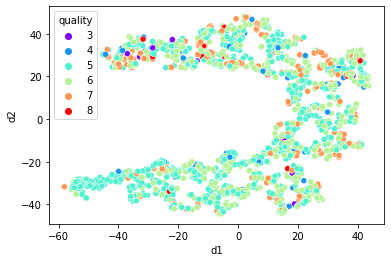

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_2D = tsne.fit_transform(X)
X_2D = pd.DataFrame(X_2D, columns=["d1", "d2"])
y_df = pd.DataFrame(y, columns=["quality"])

df_2D = X_2D.join(y_df)


sns.scatterplot(data=df_2D, x="d1", y="d2", hue="quality", palette="rainbow")